# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [30]:
# Load pickled data
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data
from sklearn.utils import shuffle

training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [31]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [32]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
def visualize(X_train,case="default"):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(1,1))
    print(image)
    plt.imshow(image, cmap="gray")
    if case == "augmented":
        print(augmented_y[index])
    elif case == "test":
        print(y_test[index])
    elif case == "valid":
        print(y_valid[index])
    else:
        print(y_train[index])
    print(image.shape)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [33]:
y_label_count = np.bincount(y_train)
minimumcount = int(np.mean(y_label_count))
# print(y_label_count.size)
# print(minimumcount)

#         print(temp)
count=0
for i in range(len(y_label_count)):
    if(y_label_count[i]< minimumcount):
        count+=minimumcount-y_label_count[i]
print(count)

11915


In [34]:
print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

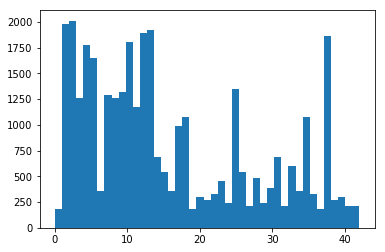

In [35]:
plt.hist(y_train,bins=n_classes)

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def normalize(x):
    x = x/255*0.8+0.1
    return x


In [8]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     grey = np.zeros((image.shape[0], image.shape[1])) # init 2D numpy array
#     # get row number
#     for rownum in range(len(image)):
#        for colnum in range(len(image[rownum])):
#           grey[rownum][colnum] = int((int(image[rownum][colnum][0])+int(image[rownum][colnum][1])+int(image[rownum][colnum][2]))/3)
#     return grey

In [9]:
def gray_scale_pipeline(img):
    image_ = []
    for i in img:
        temp = grayscale(i)
        image_.append(temp)
    return np.array(image_)

In [10]:
def preprocess(X_data,case="default"):
    temp_data = X_data
    temp_data = gray_scale_pipeline(temp_data)
#     visualize(temp_data,case)
    temp_data = normalize(temp_data)
    return temp_data

In [11]:
################Preprocesing training and test data#################################3
from numpy import newaxis

X_train  = preprocess(X_train)
X_train = X_train[...,newaxis]
# print(X_train.shape)

X_test =  preprocess(X_test,"test")
X_test = X_test[...,newaxis]
# print(X_test.shape)



Using TensorFlow backend.


[[ 0.18156862  0.17843138  0.17529412 ...,  0.20039216  0.1972549
   0.1972549 ]
 [ 0.18156862  0.17843138  0.17529412 ...,  0.1972549   0.20039216
   0.20039216]
 [ 0.18156862  0.17843138  0.17529412 ...,  0.20039216  0.20666666
   0.20666666]
 ..., 
 [ 0.18470588  0.18470588  0.17529412 ...,  0.21294117  0.20666666
   0.1972549 ]
 [ 0.18470588  0.18156862  0.17529412 ...,  0.21294117  0.20666666
   0.1972549 ]
 [ 0.18156862  0.18470588  0.17843138 ...,  0.21294117  0.20666666
   0.1972549 ]]
30
(32, 32)
(34799,)
(11941, 32, 32, 1)
(11941,)


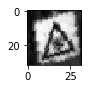

In [12]:
#Augmentation of data####
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        shear_range = 0.2,
        fill_mode='nearest')
augmented_x=[]
datagen.fit(X_train)
augmented_y=[]
for i in range(len(y_label_count)):
    if y_label_count[i] < minimumcount:
        
        temp = np.where(y_train == i )
        count = 0
        for x_temp,y_temp in datagen.flow(X_train[temp],y_train[temp],batch_size = 1):
            count+=1
            augmented_x.append(x_temp[0])
            augmented_y.append(y_temp[0])
            if(count > minimumcount-y_label_count[i]):
                break
augmented_x=np.array(augmented_x)
augmented_y=np.array(augmented_y)
visualize(augmented_x,"augmented")
print(y_train.shape)
print(augmented_x.shape)
print(augmented_y.shape)
X_train = np.append(X_train, augmented_x, axis=0)
y_train = np.append(y_train, augmented_y, axis=0)
X_train, X_valid1, y_train, y_valid1 = train_test_split(X_train, y_train, stratify = y_train, test_size=0.1, random_state=23)

(array([  729.,  1782.,  1809.,  1134.,  1593.,  1485.,   729.,  1161.,
         1134.,  1188.,  1620.,  1053.,  1701.,  1728.,   729.,   729.,
          729.,   891.,   972.,   729.,   729.,   729.,   729.,   729.,
          729.,  1215.,   729.,   729.,   729.,   729.,   729.,   729.,
          729.,   729.,   729.,   972.,   729.,   729.,  1674.,   729.,
          729.,   729.,   729.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

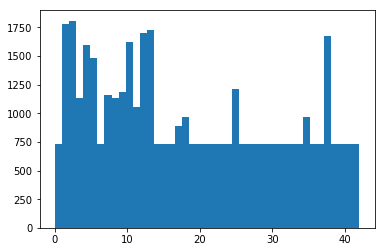

In [28]:
plt.hist(y_train,bins=n_classes)

In [12]:
##Dumping the normalized training and testing data into the pickle to extract later##
pickle.dump(X_train,open("x_train.p","wb"))
pickle.dump(X_test,open("x_test.p","wb"))

### Model Architecture

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
EPOCHS=25
BATCH_SIZE=150
def Model_Arch(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    filter_1 = tf.Variable(tf.truncated_normal(shape = (5,5,1,6),mean = mu,stddev = sigma))
    bias_1 = tf.Variable(tf.zeros(6))
    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #conv2d takes input,filter,strides,padding
    conv1 = tf.nn.conv2d(x,filter_1,strides=[1,1,1,1],padding = 'VALID')
    #adding bias 
    conv1 = conv1 + bias_1
    
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    
    #maxpool takes input,internalwindowsize,strides,padding
    
    conv1 = tf.nn.avg_pool(conv1,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'VALID')
    
    first_layer_output = conv1
    #first_layer_output_size  14*14*6
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    #shape for truncatednormal in filter is (,,inputdepth,outputdepth)
    
    filter_2 = tf.Variable(tf.truncated_normal(shape = (5,5,6,16),mean = mu,stddev = sigma))
    
    bias_2 = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(first_layer_output,filter_2,strides=[1,1,1,1],padding = 'VALID')
    conv2 = conv2+bias_2
    
    
    
    
    # TODO: Activation.
    
    conv2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    
    conv2 = tf.nn.avg_pool(conv2,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    
    second_layer_output = conv2
    
    flatted_input = flatten(second_layer_output)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    weight_1  = tf.Variable(tf.truncated_normal(shape = (400,200),mean = mu,stddev = sigma))
    bias_3 = tf.Variable(tf.zeros(200))
    
    output = tf.add(tf.matmul(flatted_input,weight_1),bias_3)
    # TODO: Activation.
    output = tf.nn.relu(output)
    output = tf.nn.dropout(output, prob)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    weight_2  = tf.Variable(tf.truncated_normal(shape = (200,100),mean = mu,stddev = sigma))
    bias_4  = tf.Variable(tf.zeros(100))
    output2 = tf.add(tf.matmul(output,weight_2),bias_4)
    output2 = tf.nn.relu(output2)
    output2 = tf.nn.dropout(output2, prob)
    
    # TODO: Activation.

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    weight_3 = tf.Variable(tf.truncated_normal(shape=(100,43),mean = mu,stddev = sigma))
    bias_5 = tf.Variable(tf.zeros(43))
    output3 = tf.add(tf.matmul(output2,weight_3),bias_5)
    logits = output3
    return logits




### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
#Place Holders:-
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [15]:
###Training Pipeline the dataset####
rate = 0.005

logits = Model_Arch(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
###Evalute the model####

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
###Training out Model#####
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,prob:0.7})
            
        validation_accuracy = evaluate(X_valid1, y_valid1)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'TrafficSign.ckpt')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.786

EPOCH 2 ...
Validation Accuracy = 0.874

EPOCH 3 ...
Validation Accuracy = 0.915

EPOCH 4 ...
Validation Accuracy = 0.939

EPOCH 5 ...
Validation Accuracy = 0.959

EPOCH 6 ...
Validation Accuracy = 0.960

EPOCH 7 ...
Validation Accuracy = 0.966

EPOCH 8 ...
Validation Accuracy = 0.972

EPOCH 9 ...
Validation Accuracy = 0.975

EPOCH 10 ...
Validation Accuracy = 0.969

EPOCH 11 ...
Validation Accuracy = 0.978

EPOCH 12 ...
Validation Accuracy = 0.976

EPOCH 13 ...
Validation Accuracy = 0.979

EPOCH 14 ...
Validation Accuracy = 0.974

EPOCH 15 ...
Validation Accuracy = 0.980

EPOCH 16 ...
Validation Accuracy = 0.979

EPOCH 17 ...
Validation Accuracy = 0.980

EPOCH 18 ...
Validation Accuracy = 0.983

EPOCH 19 ...
Validation Accuracy = 0.983

EPOCH 20 ...
Validation Accuracy = 0.984

EPOCH 21 ...
Validation Accuracy = 0.980

EPOCH 22 ...
Validation Accuracy = 0.987

EPOCH 23 ...
Validation Accuracy = 0.986

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [17]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './TrafficSign.ckpt')

    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test,prob : 1.0})

print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.9244661331176758


In [18]:
###validating my model##############
from numpy import newaxis
X_valid = preprocess(X_valid,"valid")
X_valid = X_valid[...,newaxis]
saver = tf.train.Saver()
with tf.Session() as sess:
    sess = tf.get_default_session()
    saver.restore(sess, './TrafficSign.ckpt')

    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_valid, y: y_valid,prob : 1.0})

print('Validation Accuracy: {}'.format(test_accuracy))

Validation Accuracy: 0.9498868584632874


### Predict the Sign Type for Each Image

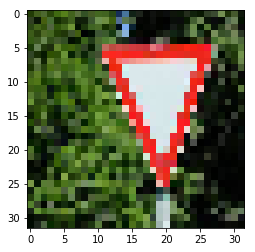

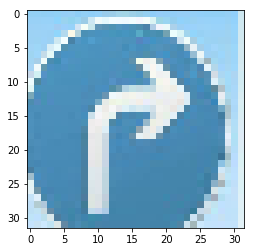

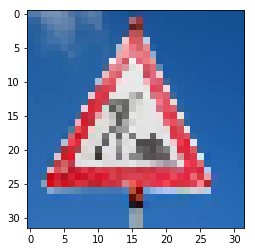

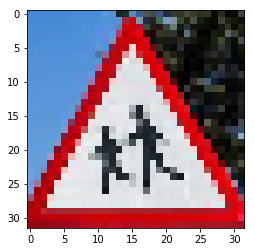

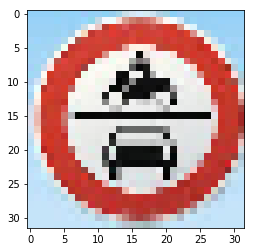

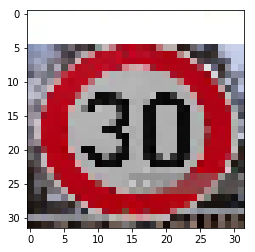

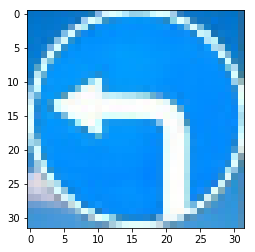

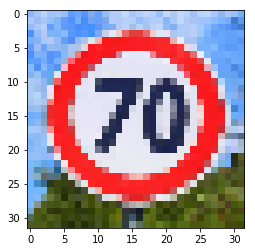

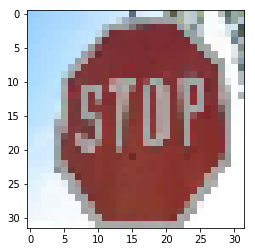

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg
test_images = os.listdir("TestImages/")

# Show the images, add to a list to process for classifying
test_image_list = []
for i in range(1,len(test_images)+1):
    temp_image = './TestImages/Image' + str(i)+'.jpg'
    temp_image = mpimg.imread(temp_image)
    temp_image = cv2.resize(temp_image,(32,32))
    test_image_list.append(temp_image)
    plt.imshow(temp_image)
    plt.show()

### Analyze Performance

In [20]:
###Preprocessing the testing images###################
test_image_list=np.asarray(test_image_list)
print(test_image_list.shape)
test_image_list=preprocess(test_image_list)
test_image_list =test_image_list[...,newaxis]
print(test_image_list.shape)

(9, 32, 32, 3)
(9, 32, 32, 1)


In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
#     saver.restore(sess, './TrafficSign.ckpt')
    new_saver = tf.train.import_meta_graph('TrafficSign.ckpt.meta')
    new_saver.restore(sess,tf.train.latest_checkpoint('.'))
    test_images_output = sess.run(tf.nn.softmax(logits), feed_dict={x: test_image_list,prob : 1.0})
print(test_images_output)

[[  9.51042638e-30   2.03337635e-24   1.47895404e-15   8.75414354e-20
    2.54499200e-32   9.49562067e-18   2.02060358e-38   6.60980238e-31
    1.11808498e-25   2.66645839e-16   1.79132601e-13   2.72037863e-23
    1.99642750e-11   9.95927274e-01   6.40175304e-15   1.10007603e-08
    6.22605344e-32   1.59379564e-23   2.26279766e-29   5.82188169e-31
    6.97051599e-30   4.27113449e-20   2.12210371e-11   1.00138302e-14
    2.44106613e-28   3.89079827e-12   4.99356280e-18   0.00000000e+00
    2.81531535e-20   1.11311926e-09   1.12238191e-21   9.22313451e-22
    4.74119406e-25   9.18169951e-17   4.07269783e-03   2.13038320e-09
    2.80156437e-24   7.19347694e-17   5.16268361e-09   5.58657735e-25
    1.36397380e-23   1.98343322e-32   3.10547254e-19]
 [  5.42530485e-13   6.67005784e-13   1.05594544e-11   1.20520260e-08
    1.32113999e-14   8.23096018e-12   3.85432825e-10   5.15020638e-15
    1.37967179e-13   1.01031558e-10   1.13957528e-08   2.40553105e-10
    1.02684979e-11   1.12821397e-07 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(test_images_output, k=5, sorted=True))
import csv
answers_list = []
probabilty_list = []
for i in range(0,len(predicts[0])):
    answers_list.append(predicts[1][i])
    probabilty_list.append(predicts[0][i])
print(answers_list)
import csv
complete_prediction = []
for i in answers_list:
    temp=[]
    for j in i:
       
        with open('signnames.csv') as csvfile:
             reader = csv.DictReader(csvfile)
             for row in reader:
                if row['ClassId'] == str(j):
                    temp.append(row['SignName'])
    complete_prediction.append(temp)


[array([13, 34, 15, 38, 35], dtype=int32), array([33, 14, 13, 38, 17], dtype=int32), array([25, 31, 24, 29, 21], dtype=int32), array([30, 29, 25, 24, 23], dtype=int32), array([14, 34, 17, 38, 33], dtype=int32), array([1, 5, 4, 0, 3], dtype=int32), array([34, 23, 32, 10, 17], dtype=int32), array([ 4,  1,  0,  5, 16], dtype=int32), array([14, 38, 15, 17, 33], dtype=int32)]


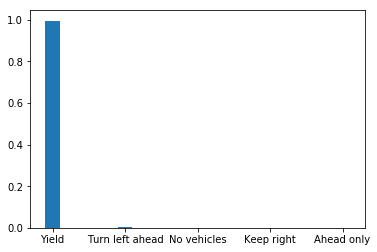

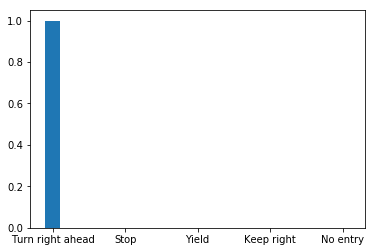

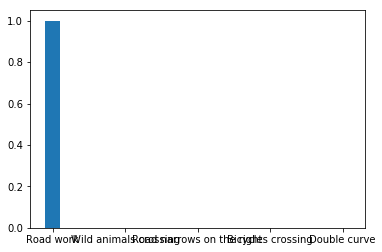

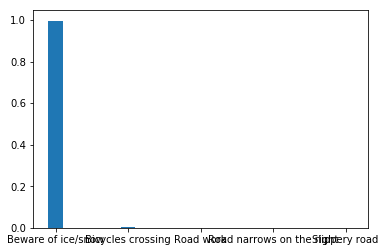

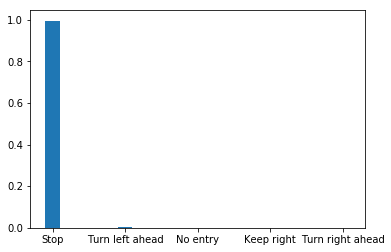

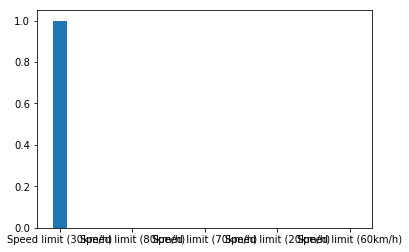

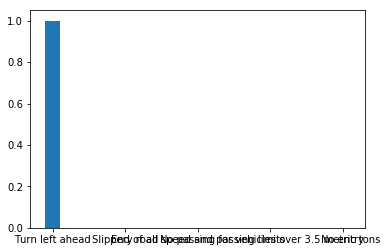

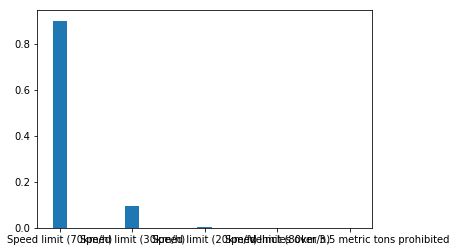

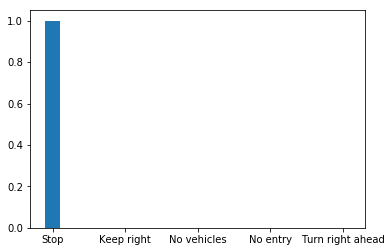

In [23]:
for i in range(len(predicts[0])):
    temp = [i for i in range(1,len(complete_prediction[i])+1)]
    plt.bar(temp,probabilty_list[i],width = 0.2,orientation = "vertical")
    plt.xticks(temp,complete_prediction[i])
    plt.show()

In [24]:
for i in range(len(predicts[0])):
    print("For Image ",str(i+1),"Probability's are")
    for j in range(len(complete_prediction[i])):
        print(str(complete_prediction[i][j]),"\t\t\t\t",str(probabilty_list[i][j]))
    print("\n\n")
        

For Image  1 Probability's are
Yield 				 0.995927
Turn left ahead 				 0.0040727
No vehicles 				 1.10008e-08
Keep right 				 5.16268e-09
Ahead only 				 2.13038e-09



For Image  2 Probability's are
Turn right ahead 				 0.99911
Stop 				 0.000889522
Yield 				 1.12821e-07
Keep right 				 8.23998e-08
No entry 				 3.56418e-08



For Image  3 Probability's are
Road work 				 0.999922
Wild animals crossing 				 6.98046e-05
Road narrows on the right 				 7.54203e-06
Bicycles crossing 				 3.58383e-07
Double curve 				 1.17357e-07



For Image  4 Probability's are
Beware of ice/snow 				 0.996524
Bicycles crossing 				 0.00339599
Road work 				 3.2852e-05
Road narrows on the right 				 2.63804e-05
Slippery road 				 1.73779e-05



For Image  5 Probability's are
Stop 				 0.994628
Turn left ahead 				 0.00512475
No entry 				 0.000216603
Keep right 				 1.88807e-05
Turn right ahead 				 1.01744e-05



For Image  6 Probability's are
Speed limit (30km/h) 				 0.999125
Speed limit (80km/h) 	